In [13]:
import pandas as pd

# Load the data from the text file
file_path = 'boys_2023.txt'

# Function to correctly parse the school and highest_speed_rating columns
def parse_school_and_rating(row):
    parts = row.split()
    index = parts[0]
    name = ' '.join(parts[1:3])
    grade = parts[3]
    sec_class = parts[4]
    
    # Find where the school name ends and ratings begin
    rating_start_index = -1
    for i in range(5, len(parts)):
        try:
            float(parts[i])
            rating_start_index = i
            break
        except ValueError:
            continue
    
    school = ' '.join(parts[5:rating_start_index])
    highest_speed_rating = float(parts[rating_start_index])
    overall_speed_rating = float(parts[rating_start_index + 1])
    race_ratings = parts[rating_start_index + 2:]
    
    # Fill race ratings to ensure there are 14 columns
    while len(race_ratings) < 14:
        race_ratings.append(None)
    
    # Prepare the row in the desired format
    row_data = [index, name, grade, sec_class, school, highest_speed_rating, overall_speed_rating] + race_ratings
    return row_data

# Read the data from the text file line by line and parse it
with open(file_path, 'r') as file:
    lines = file.readlines()

parsed_data = [parse_school_and_rating(line) for line in lines]

# Define columns
column_names = [
    "index", "name", "grade", "sec_class", "school", "highest_speed_rating", 
    "overall_speed_rating", "race_rating_1", "race_rating_2", "race_rating_3", 
    "race_rating_4", "race_rating_5", "race_rating_6", "race_rating_7", 
    "race_rating_8", "race_rating_9", "race_rating_10", "race_rating_11", 
    "race_rating_12", "race_rating_13", "race_rating_14"
]

# Create a DataFrame
df = pd.DataFrame(parsed_data, columns=column_names)

df.head() ,df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 139 non-null    object 
 1   name                  139 non-null    object 
 2   grade                 139 non-null    object 
 3   sec_class             139 non-null    object 
 4   school                139 non-null    object 
 5   highest_speed_rating  139 non-null    float64
 6   overall_speed_rating  139 non-null    float64
 7   race_rating_1         139 non-null    object 
 8   race_rating_2         139 non-null    object 
 9   race_rating_3         139 non-null    object 
 10  race_rating_4         139 non-null    object 
 11  race_rating_5         139 non-null    object 
 12  race_rating_6         133 non-null    object 
 13  race_rating_7         122 non-null    object 
 14  race_rating_8         103 non-null    object 
 15  race_rating_9         7

(  index              name grade sec_class          school  \
 0     1      Nolan McGinn    12      03-A              FM   
 1     2  Logan Schaeffler    12      08-A         Calhoun   
 2     3        Van Furman    11      09-D      Tri-Valley   
 3     4    Douglas Antaky    12      11-A       Smithtown   
 4     5      Shane Murphy    12       PSA  Hunter College   
 
    highest_speed_rating  overall_speed_rating race_rating_1 race_rating_2  \
 0                193.73                 194.0           190           180   
 1                189.40                 189.0           185           183   
 2                188.47                 188.0           183           161   
 3                188.33                 188.0           185           167   
 4                186.70                 187.0           185           178   
 
   race_rating_3  ... race_rating_5 race_rating_6 race_rating_7 race_rating_8  \
 0           191  ...           194           186           188           1

In [14]:
# Convert race ratings to numeric
for col in column_names[7:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Filter rows with at least 8 race ratings
df['num_race_ratings'] = df[column_names[7:]].notna().sum(axis=1)
df = df[df['num_race_ratings'] >= 8].drop(columns=['num_race_ratings'])

df = df[['index', 'name', 'grade', 'sec_class', 'school', 'highest_speed_rating', 
         'overall_speed_rating', 'race_rating_1', 'race_rating_2', 'race_rating_3', 
         'race_rating_4', 'race_rating_5', 'race_rating_6', 'race_rating_7', 
         'race_rating_8']]

# Renaming the columns to match the new flipped order
df.rename(columns={
    'race_rating_8': 'race_rating_1',
    'race_rating_7': 'race_rating_2',
    'race_rating_6': 'race_rating_3',
    'race_rating_5': 'race_rating_4',
    'race_rating_4': 'race_rating_5',
    'race_rating_3': 'race_rating_6',
    'race_rating_2': 'race_rating_7',
    'race_rating_1': 'race_rating_8'
}, inplace=True)

df = df[['index', 'name', 'grade', 'sec_class', 'school', 'highest_speed_rating', 
         'overall_speed_rating', 'race_rating_1', 'race_rating_2', 'race_rating_3', 
         'race_rating_4', 'race_rating_5', 'race_rating_6', 'race_rating_7', 
         'race_rating_8']]

df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, 0 to 136
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 103 non-null    object 
 1   name                  103 non-null    object 
 2   grade                 103 non-null    object 
 3   sec_class             103 non-null    object 
 4   school                103 non-null    object 
 5   highest_speed_rating  103 non-null    float64
 6   overall_speed_rating  103 non-null    float64
 7   race_rating_1         103 non-null    float64
 8   race_rating_2         103 non-null    float64
 9   race_rating_3         103 non-null    float64
 10  race_rating_4         103 non-null    int64  
 11  race_rating_5         103 non-null    int64  
 12  race_rating_6         103 non-null    int64  
 13  race_rating_7         103 non-null    int64  
 14  race_rating_8         103 non-null    int64  
dtypes: float64(5), int64(5), obj

(  index            name grade sec_class          school  highest_speed_rating  \
 0     1    Nolan McGinn    12      03-A              FM                193.73   
 2     3      Van Furman    11      09-D      Tri-Valley                188.47   
 3     4  Douglas Antaky    12      11-A       Smithtown                188.33   
 4     5    Shane Murphy    12       PSA  Hunter College                186.70   
 5     6     Ethan Green    12      01-A       Arlington                185.60   
 
    overall_speed_rating  race_rating_1  race_rating_2  race_rating_3  \
 0                 194.0          190.0          188.0          186.0   
 2                 188.0          179.0          175.0          183.0   
 3                 188.0          183.0          178.0          181.0   
 4                 187.0          178.0          185.0          180.0   
 5                 186.0          181.0          177.0          185.0   
 
    race_rating_4  race_rating_5  race_rating_6  race_rating_7  ra

Epoch 1/200
18/18 [==============================] - 0s 7ms/step - loss: 20918.7578 - val_loss: 14506.8271
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 11222.2930 - val_loss: 8533.7432
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 7268.1577 - val_loss: 5773.1821
Epoch 4/200
18/18 [==============================] - 0s 2ms/step - loss: 5078.9233 - val_loss: 4300.0352
Epoch 5/200
18/18 [==============================] - 0s 2ms/step - loss: 3662.2830 - val_loss: 2959.6685
Epoch 6/200
18/18 [==============================] - 0s 2ms/step - loss: 1637.8546 - val_loss: 204.2340
Epoch 7/200
18/18 [==============================] - 0s 2ms/step - loss: 127.8588 - val_loss: 122.8911
Epoch 8/200
18/18 [==============================] - 0s 2ms/step - loss: 7961.4351 - val_loss: 1874.1720
Epoch 9/200
18/18 [==============================] - 0s 2ms/step - loss: 1285.2446 - val_loss: 998.4873
Epoch 10/200
18/18 [==============================] - 0s

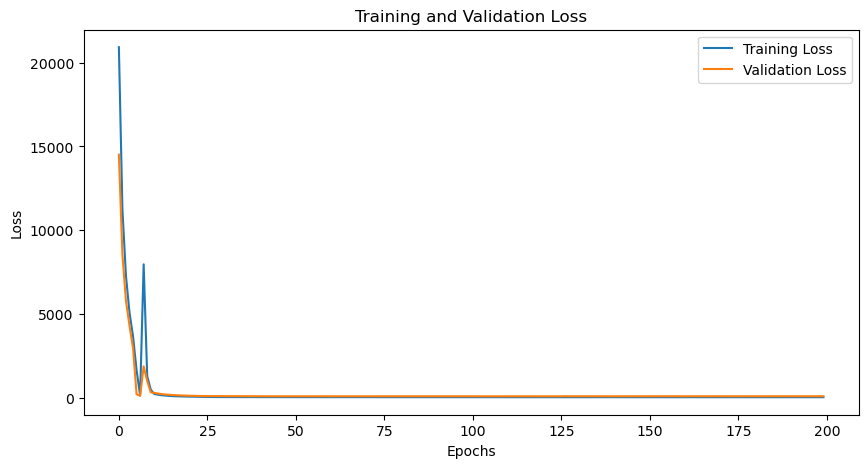

Input Ratings: [  0.   0.   0.   0.   0.   0. 179.]
Target Ratings: [188. 186. 194. 191. 191. 180. 190.]
Predicted Ratings: [156.56233, 161.49359, 162.14113, 163.23972, 164.1292, 162.82971, 157.88593]


In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Assuming 'df' is your dataframe and it has been already preprocessed
# Prepare the data for LSTM model
race_ratings = df[['race_rating_1', 'race_rating_2', 'race_rating_3', 'race_rating_4', 'race_rating_5', 'race_rating_6', 'race_rating_7', 'race_rating_8']].values

# Create variable-length sequences
X = []
y = []

for rating in race_ratings:
    for i in range(1, 8):
        X.append(rating[:i])
        y.append(rating[i])

# Pad sequences to the maximum length
X = pad_sequences(X, maxlen=7, dtype='float32', padding='pre')
y = np.array(y)

# Reshape X to fit LSTM input shape (samples, time_steps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# Plot the loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Show an example prediction from the test set
example_index = 0  # Change this index to see different examples
example_input = X_test[example_index].flatten()

predicted_ratings = []
input_sequence = example_input[:1]

for i in range(1, 8):
    padded_sequence = np.pad(input_sequence, (7 - len(input_sequence), 0), 'constant').reshape((1, 7, 1))
    prediction = model.predict(padded_sequence, verbose=0)
    predicted_ratings.append(prediction.flatten()[0])
    input_sequence = np.append(input_sequence, prediction)

print(f'Input Ratings: {example_input}')
print(f'Target Ratings: {race_ratings[example_index][1:]}')
print(f'Predicted Ratings: {predicted_ratings}')

